In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

import cv2
import os
import math
import warnings

def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

In [2]:
#取得trainData
data_path = '//home/jovyan/at073-group50/dataset/20bn_jester_500/train/'
trainSet = pd.DataFrame([])
# images 的路徑
path_list = os.listdir(data_path)
path_list = sorted(path_list)
for path in path_list:
    fp = []
    try:        
        sub_dirs = os.listdir(data_path + path + '/')
        sub_dirs = sorted(sub_dirs)
        for sdir in sub_dirs:
            fp.append(data_path + path + '/' + sdir + '/')
    except NotADirectoryError:
        pass
    trainSet = pd.concat([trainSet, pd.DataFrame({'subdir_path':fp, 'class':path})], ignore_index=True)

In [3]:
#取得validationData
data_path = '//home/jovyan/at073-group50/dataset/20bn_jester_500/validation/'
testSet = pd.DataFrame([])
# images 的路徑
path_list = os.listdir(data_path)
path_list = sorted(path_list)
for path in path_list:
    fp = []
    try:        
        sub_dirs = os.listdir(data_path + path + '/')
        sub_dirs = sorted(sub_dirs)
        for sdir in sub_dirs:
            fp.append(data_path + path + '/' + sdir + '/')
    except NotADirectoryError:
        pass
    testSet = pd.concat([testSet, pd.DataFrame({'subdir_path':fp, 'class':path})], ignore_index=True)

In [4]:
#定義目標類別
class_file = '//home/jovyan/at073-group50/dataset/20bn_jester_500/classes.csv'
with open(class_file) as f:
    classes = f.readlines()
classes = [c.strip() for c in classes]
num_classes = len(classes)

for i in range(num_classes):
    trainSet['class'][trainSet['class'] == classes[i]] = i
    testSet['class'][testSet['class'] == classes[i]] = i

In [5]:
print('Train Shape:', trainSet.shape, 'Test Shape:', testSet.shape)

Train Shape: (6500, 2) Test Shape: (650, 2)


In [6]:
frameFolder = '/20bn_jester_500/'
optxFolder = '/20bn_jester_500_opt_x/'
optyFolder = '/20bn_jester_500_opt_y/'

opt x: //home/jovyan/at073-group50/dataset/20bn_jester_500_opt_x/train/Doing other things/100212/00001.jpg 
opt y: //home/jovyan/at073-group50/dataset/20bn_jester_500_opt_y/train/Doing other things/100212/00001.jpg
img x shape: (100, 176)


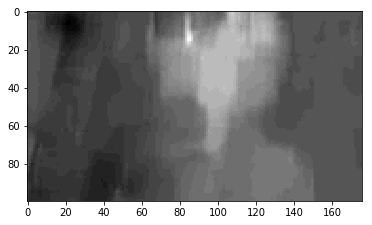

img y shape: (100, 176)


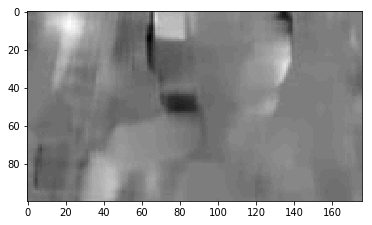

img stack shape: (100, 176, 2) 

opt x: //home/jovyan/at073-group50/dataset/20bn_jester_500_opt_x/train/Doing other things/100212/00002.jpg 
opt y: //home/jovyan/at073-group50/dataset/20bn_jester_500_opt_y/train/Doing other things/100212/00002.jpg
img x shape: (100, 176)


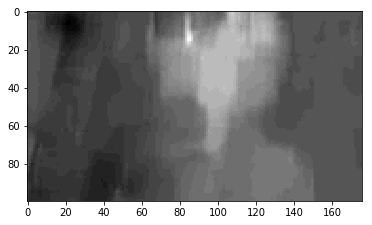

img y shape: (100, 176)


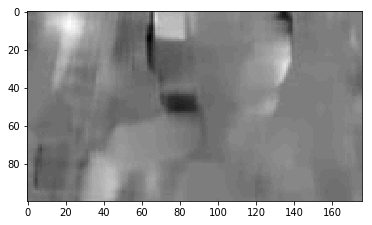

img stack shape: (100, 176, 2) 

opt x: //home/jovyan/at073-group50/dataset/20bn_jester_500_opt_x/train/Doing other things/100212/00003.jpg 
opt y: //home/jovyan/at073-group50/dataset/20bn_jester_500_opt_y/train/Doing other things/100212/00003.jpg
img x shape: (100, 176)


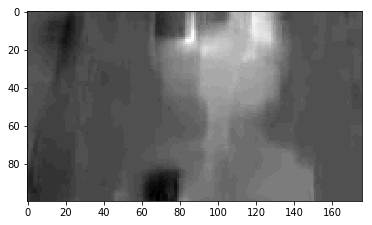

img y shape: (100, 176)


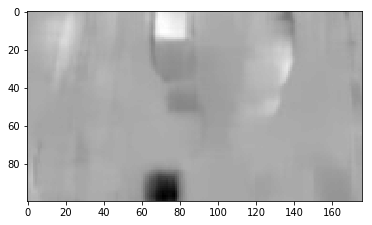

img stack shape: (100, 176, 2) 



In [7]:
file_list = sorted(os.listdir(trainSet['subdir_path'][0]))
i = 0
for f in file_list:
    if (f.find('.jpg') < 0):
        continue
    filePathX = trainSet['subdir_path'][0].replace(frameFolder, optxFolder) + f
    filePathY = trainSet['subdir_path'][0].replace(frameFolder, optyFolder) + f
    print('opt x:',filePathX,'\nopt y:', filePathY)
    #show img
    imgX = cv2.imread(filePathX, 0)
    plt.imshow(imgX, cmap=cm.gray)
    print('img x shape:', imgX.shape)    
    plt.show()
    
    imgY = cv2.imread(filePathY, 0)
    plt.imshow(imgY, cmap=cm.gray)
    print('img y shape:', imgY.shape)
    plt.show()
    
    imgStack = np.stack((imgX, imgY), axis=-1)
    print('img stack shape:', imgStack.shape, '\n')
    
    i += 1
    if i > 2: break

opt x: //home/jovyan/at073-group50/dataset/20bn_jester_500_opt_x/validation/Doing other things/101407/00001.jpg 
opt y: //home/jovyan/at073-group50/dataset/20bn_jester_500_opt_y/validation/Doing other things/101407/00001.jpg


TypeError: Image data cannot be converted to float

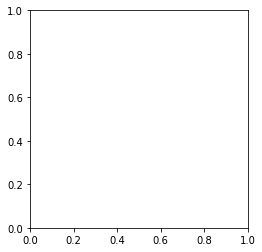

In [8]:
file_list = sorted(os.listdir(testSet['subdir_path'][0]))
i = 0
for f in file_list:
    if (f.find('.jpg') < 0):
        continue
    filePathX = testSet['subdir_path'][0].replace(frameFolder, optxFolder) + f
    filePathY = testSet['subdir_path'][0].replace(frameFolder, optyFolder) + f
    print('opt x:',filePathX,'\nopt y:', filePathY)
    #show img
    imgX = cv2.imread(filePathX, 0)
    plt.imshow(imgX, cmap=cm.gray)
    print('img x shape:', imgX.shape)    
    plt.show()
    
    imgY = cv2.imread(filePathY, 0)
    plt.imshow(imgY, cmap=cm.gray)
    print('img y shape:', imgY.shape)
    plt.show()
    
    imgStack = np.stack((imgX, imgY), axis=-1)
    print('img stack shape:', imgStack.shape, '\n')
    
    i += 1
    if i > 2: break

In [ ]:
def CountFrameNums(dir_paths, num_frames):
    total = 0
    for d in dir_paths:
        files = os.listdir(d)
        subC = 0
        for f in files:
            if f.find('.jpg') >= 0:
                subC+=1
        total += subC - num_frames + 1
    return total